In [1]:
# Full library list and version numbers

print('This notebook was prepared using:')

import sys
print('python version %s' % sys.version)

import numpy as np
print('numpy version %s' % np.__version__)

import seaborn as sns
print('seaborn version %s' % sns.__version__)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
print('matplotlib version %s' % matplotlib.__version__)

import scipy
from scipy import stats
print('scipy version %s' % scipy.__version__)

import pickle
print('pickle version %s' % pickle.format_version)

import importlib

# sys.path.append('../paper-clade-reconstruction/src')
sys.path.append('./src')
import MPL as MPL
import analyze_and_plot as AP
import reconstruct_clades as RC
import infer_fitness as IF
import print_info as PI
import simulation_helper as SH
import data_parser as DP
import LTEE
import LTEE_helper as LH
import mplot as mp  # See mplot.py in the current directory
import lolipop_helper
import PALTEanalysis
import tobramycin_analysis
import figures as FIG

# GitHub directories
DATA_DIR = './data'
FIG_DIR = './figures'
LOCAL_JOBS_DIR = './data/local_jobs'
SIMULATION_DIR = './data/simulation'
SIMULATION_DIR_REL = '../simulation'

LOLIPOP_JOBS_DIR = './data/lolipop/jobs'
LOLIPOP_INPUT_DIR = './data/lolipop/input'
LOLIPOP_OUTPUT_DIR = './data/lolipop/output'
LOLIPOP_PARSED_OUTPUT_DIR = './data/lolipop/parsed_output'

CLUSTER_JOBS_DIR = './data/cluster_jobs'
LTEE_TRAJ_DIR = './data/LTEE_trajectories'
CLUSTERIZATION_OUTPUT_DIR = './data/clusterization_output'
RECONSTRUCTION_OUTPUT_DIR = './data/reconstruction_output'

LTEE_TRAJ_DIR_REL = '../LTEE_trajectories'
CLUSTERIZATION_OUTPUT_DIR_REL = '../clusterization_output'

METHODS = FIG.METHODS

This notebook was prepared using:
python version 3.6.10 |Anaconda, Inc.| (default, Mar 25 2020, 18:53:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.19.1
seaborn version 0.11.0
matplotlib version 3.3.2
scipy version 1.5.2
pickle version 4.0


In [2]:
def reload():
    importlib.reload(AP)
    importlib.reload(RC)
    importlib.reload(IF)
    importlib.reload(LH)
    importlib.reload(PI)
    importlib.reload(lolipop_helper)
    importlib.reload(FIG)
    importlib.reload(PALTEanalysis)
    importlib.reload(tobramycin_analysis)
    importlib.reload(mp)
    importlib.reload(SH)
    importlib.reload(DP)
    importlib.reload(MPL)
reload()

In [3]:
def resetPlottingParams():
    PARAMS = {'text.usetex': False, 'mathtext.fontset': 'stixsans', 'mathtext.default': 'regular', 'pdf.fonttype': 42, 'ps.fonttype': 42}
    plt.rcParams.update(matplotlib.rcParamsDefault)
    plt.rcParams.update(PARAMS)

In [4]:
resetPlottingParams()

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Generate simulated data

In [16]:
# Set parameters for simulation
reload()
p = SH.Params()
SH.generate_local_shell_script(p)

Run simulations locally with command

`sh data/local_jobs/simulation_local_submission.sh`

## Plot simulated trajectories

meanS=0.03, stdS=0.01


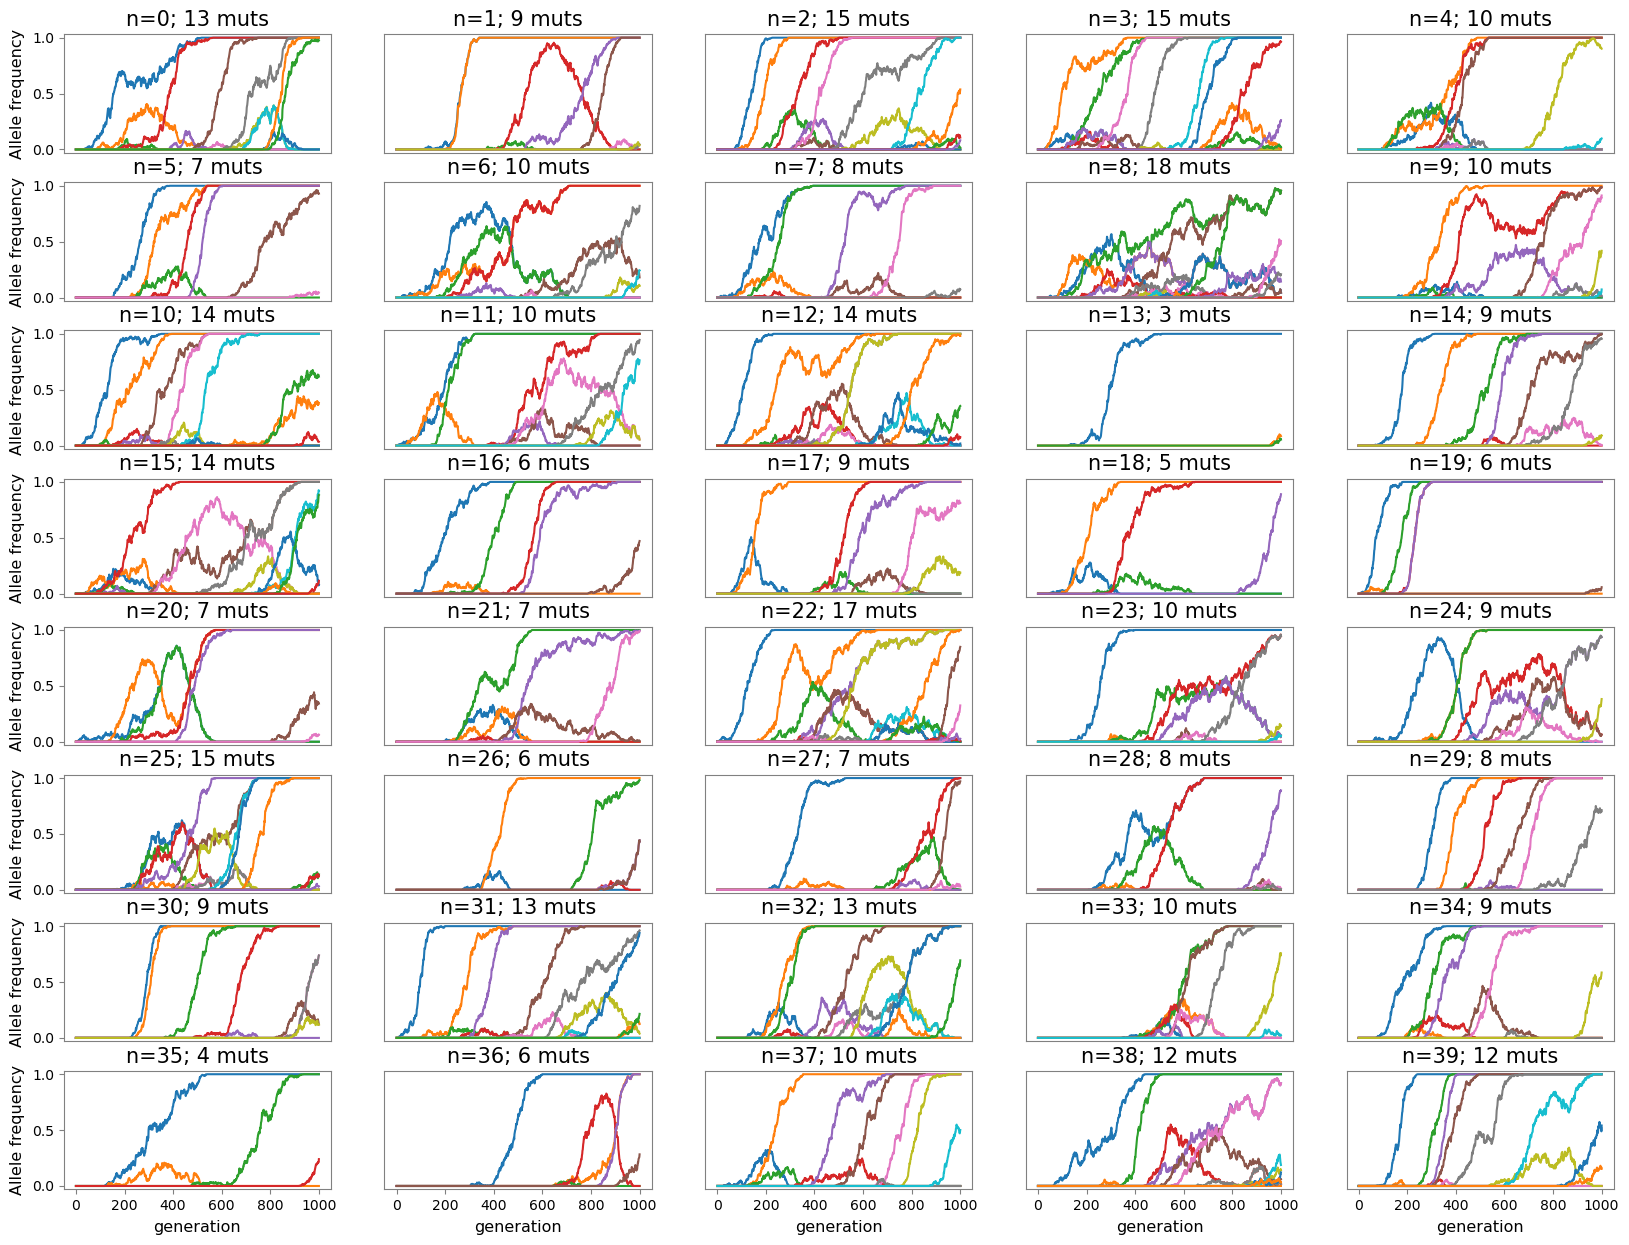

In [87]:
reload()
SH.plot_simulation(p, plot_clade_traj=False)

# Reconstruction on simulated data

In [19]:
%%time
reload()
SH.save_reconstructions_on_simulated_data(p, overwrite=False)

CPU times: user 3min 6s, sys: 10.9 s, total: 3min 17s
Wall time: 2min 52s


In [40]:
%%time
reload()
SH.save_reconstructions_on_simulated_data(p, overwrite=True)

CPU times: user 3min 4s, sys: 11.3 s, total: 3min 15s
Wall time: 2min 49s


## Inspect number of clades inferred

In [34]:
%%time
reload()
params = SH.Params()
for n in range(params.num_trials):
    reconstruction = SH.load_reconstruction_for_a_simulation(params, n)
    print(f'Sim {n}, num_clades={reconstruction.numClades}')
    RC.print_signal_percentage_by_number_of_groups(reconstruction)

Sim 0, num_clades=4
[0.198, 0.46, 1.0]
Sim 1, num_clades=4
[0.337, 1.0]
Sim 2, num_clades=7
[0.108, 0.823, 1.0]
Sim 3, num_clades=4
[0.159, 0.471, 1.0]
Sim 4, num_clades=4
[0.356, 0.396, 0.757, 1.0]
Sim 5, num_clades=5
[0.243, 1.0]
Sim 6, num_clades=4
[0.157, 0.894, 1.0]
Sim 7, num_clades=5
[0.016, 1.0]
Sim 8, num_clades=3
[0.146, 0.213, 0.962, 0.975, 1.0]
Sim 9, num_clades=2
[0.21, 1.0]
Sim 10, num_clades=6
[0.233, 1.0]
Sim 11, num_clades=5
[0.06, 0.329, 1.0]
Sim 12, num_clades=4
[0.069, 0.519, 1.0]
Sim 13, num_clades=3
[0.0, 1.0]
Sim 14, num_clades=2
[0.325, 1.0]
Sim 15, num_clades=5
[0.054, 0.791, 1.0]
Sim 16, num_clades=3
[0.751, 1.0]
Sim 17, num_clades=5
[0.002, 1.0]
Sim 18, num_clades=3
[0.009, 1.0]
Sim 19, num_clades=3
[0.997, 1.0]
Sim 20, num_clades=4
[0.188, 1.0]
Sim 21, num_clades=2
[0.017, 0.033, 0.848, 1.0]
Sim 22, num_clades=5
[0.237, 0.761, 0.977, 1.0]
Sim 23, num_clades=4
[0.089, 0.988, 1.0]
Sim 24, num_clades=4
[0.214, 1.0]
Sim 25, num_clades=5
[0.183, 0.487, 0.62, 0.77

## Example


> Forming groups from dxdx matrix...
  shared    group 1    group 2    group 3
       0          5          4          4
> Automatically set numClades=3
 Running checkForSeparablePeriodAndReconstruct()... group 1 has mutations [0, 3, 5, 8, 9]
 Running checkForSeparablePeriodAndReconstruct()... group 2 has mutations [1, 4, 10, 6]
 Running checkForSeparablePeriodAndReconstruct()... group 3 has mutations [2, 7, 11, 12]
Durations of periods:  [498, 375, 128]

> Forming groups from dxdx matrix...
  shared    group 1    group 2    group 3
       0          8          3          2
> Automatically set numClades=3


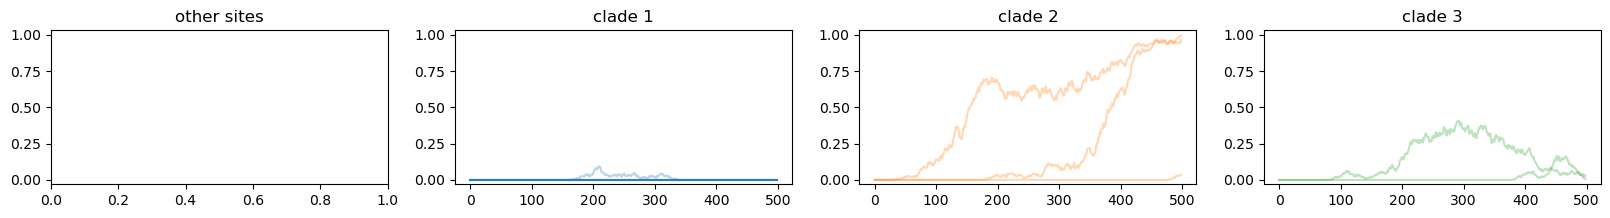

> Reclassifying mutations...
> Excluding shared mutations...
  clade 1    clade 2    clade 3    shared    fixed    minor    extinct    excluded
        1          3          2         0        0        0          7           0
> Incorporating other mutations...
> Excluding shared mutations again...


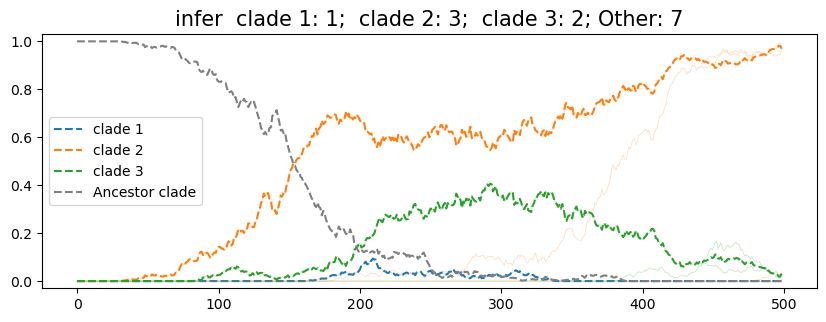

> Final clade info...
  clade 1    clade 2    clade 3    other    total
        1          3          2        7       13

> Forming groups from dxdx matrix...
  shared    group 1    group 2    group 3
       0          5          4          4
> Automatically set numClades=3


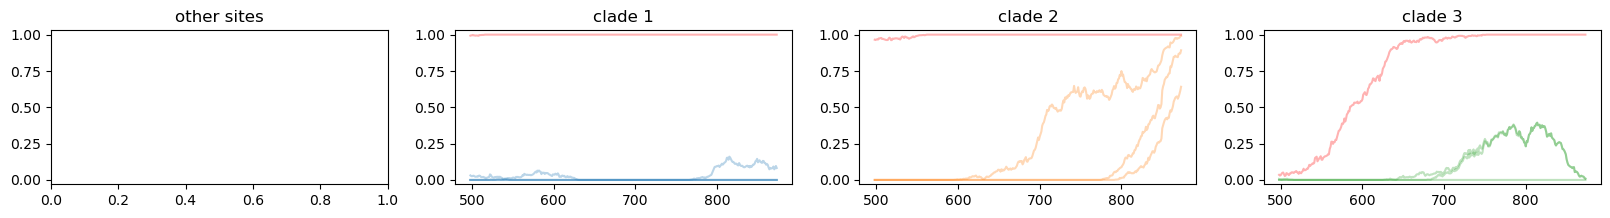

> Reclassifying mutations...
> Excluding shared mutations...
  clade 1    clade 2    clade 3    shared    fixed    minor    extinct    excluded
        2          3          3         0        3        0          2           0
> Incorporating other mutations...
> Excluding shared mutations again...
Clade 1 splits at time tStart+128


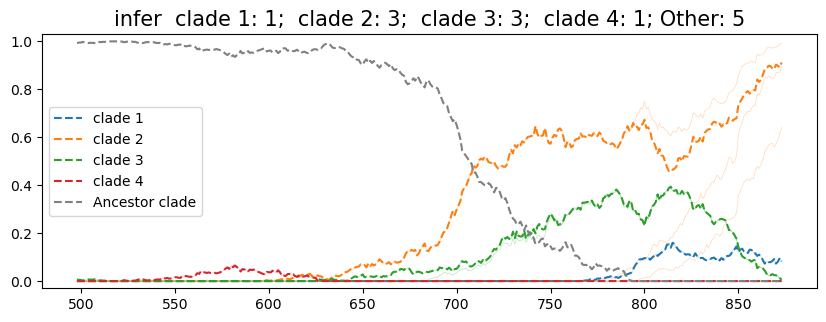

> Final clade info...
  clade 1    clade 2    clade 3    clade 4    other    total
        1          3          3          1        5       13

> Forming groups from dxdx matrix...
  shared    group 1    group 2
       0         10          3
> Automatically set numClades=1


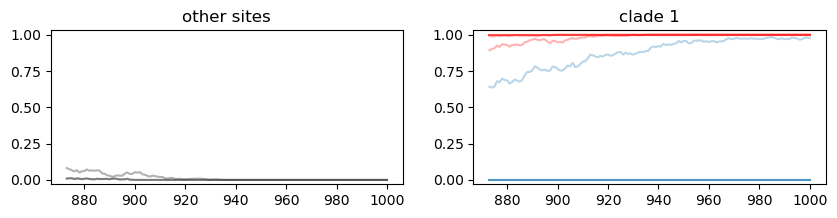

> Reclassifying mutations...
> Excluding shared mutations...
  clade 1    shared    fixed    minor    extinct    excluded
        1         0        5        3          4           0
> Incorporating other mutations...
> Excluding shared mutations again...


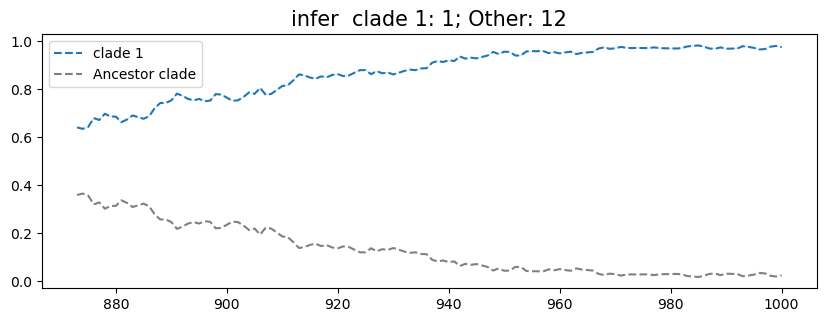

> Final clade info...
  clade 1    other    total
        1       12       13
Running removeInferredSubcladeBeforeFixation()... period 0 length: 499 cladeFreq at the end = [0.    0.969 0.031] threshold = 0.99 - 0.02 = 0.97
(0-indexed) cladesToModify: [2]
(0-indexed) cladesToRemove: []
Running removeInferredSubcladeBeforeFixation()... period 1 length: 376 cladeFreq at the end = [0.082 0.912 0.006 0.   ] threshold = 0.99 - 0.02 = 0.97
(0-indexed) cladesToModify: [0]
(0-indexed) cladesToRemove: []


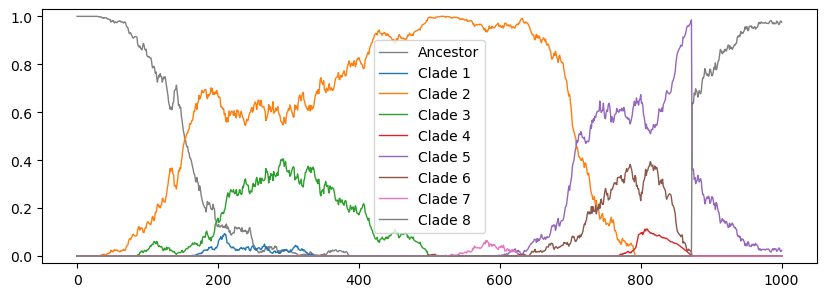

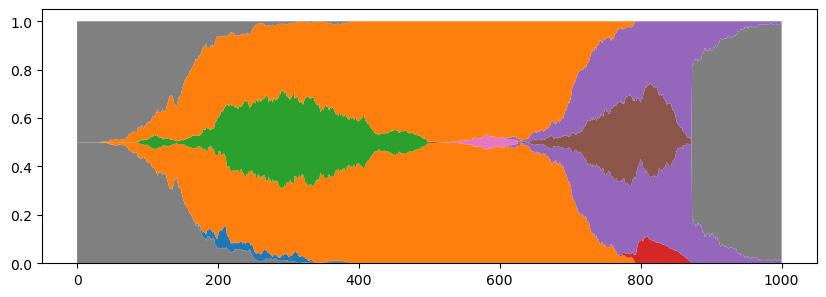


> Forming groups from dxdx matrix...
  shared    group 1    group 2    group 3
       0          8          3          2
> Automatically set numClades=3


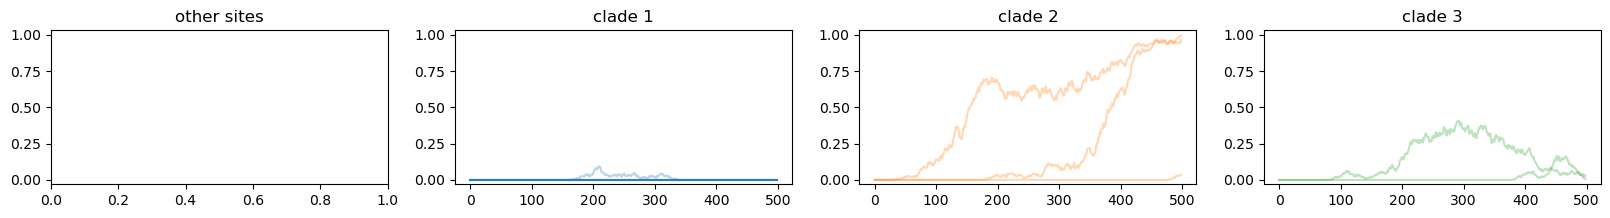

> Reclassifying mutations...
> Excluding shared mutations...
  clade 1    clade 2    clade 3    shared    fixed    minor    extinct    excluded
        1          3          2         0        0        0          7           0
> Incorporating other mutations...
> Excluding shared mutations again...


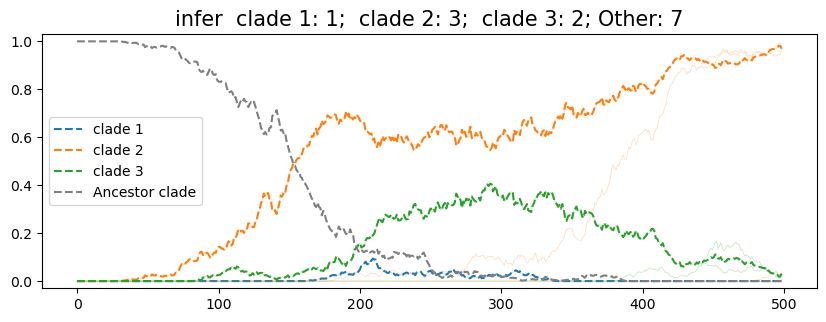

> Final clade info...
  clade 1    clade 2    clade 3    other    total
        1          3          2        7       13

> Forming groups from dxdx matrix...
  shared    group 1    group 2
       0          8          5
> Automatically set numClades=2


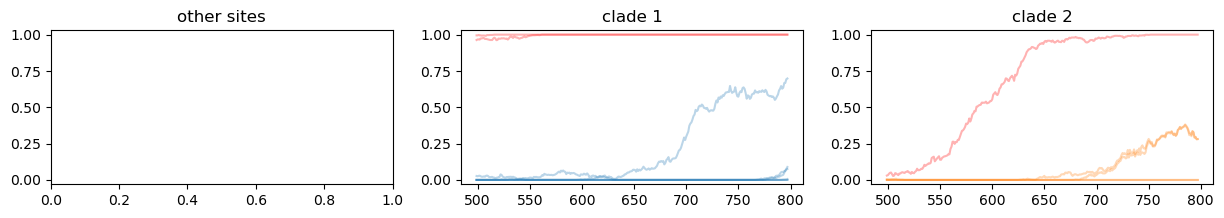

> Reclassifying mutations...
> Excluding shared mutations...
  clade 1    clade 2    shared    fixed    minor    extinct    excluded
        5          3         0        3        0          2           0
> Incorporating other mutations...
> Excluding shared mutations again...


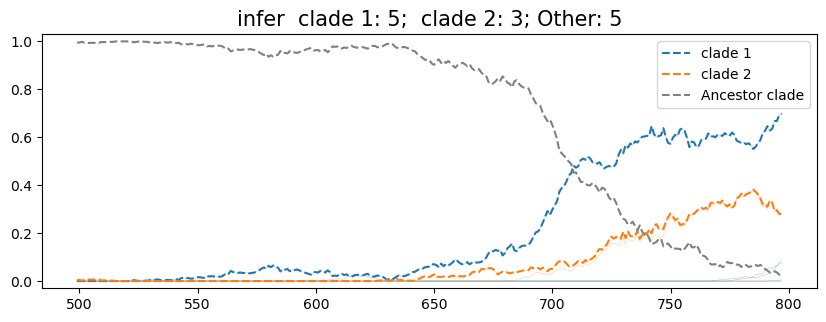

> Final clade info...
  clade 1    clade 2    other    total
        5          3        5       13

> Forming groups from dxdx matrix...
  shared    group 1    group 2
       0         10          3
> Automatically set numClades=2


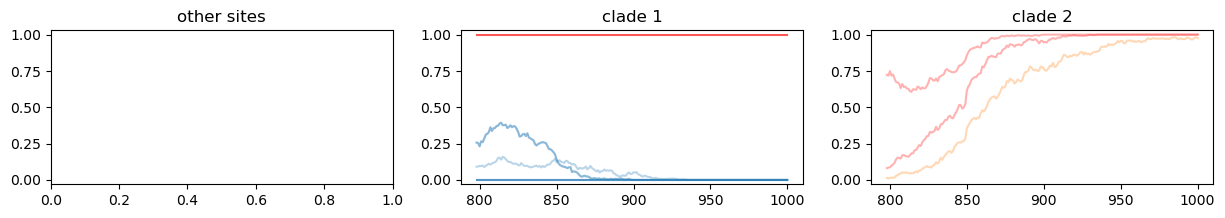

> Reclassifying mutations...
> Excluding shared mutations...
  clade 1    shared    fixed    minor    extinct    excluded
        1         0        5        0          7           0
> Incorporating other mutations...
> Excluding shared mutations again...


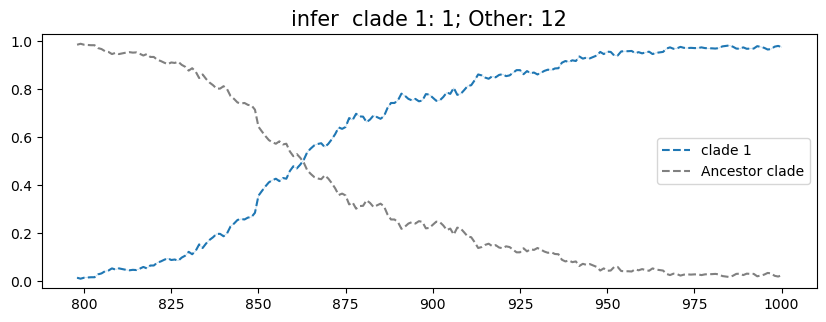

> Final clade info...
  clade 1    other    total
        1       12       13
cladeFixedTimes = [498, 873]
period boundaries:  [(0, 499), (498, 874), (873, 1001)]
ancestors:  [0, 2, 5, 8]
refined period boundaries:  [(0, 499), (499, 798), (798, 1001)]
 Running amendConnectedCladeFreq()... for 2th period (0-indexed). Modifying cladeFreq in timepoints [798, 873). ancestorIndex=5
period 2 (0-indexed), clade 1 in refined period == clade 1 in period.
t=798, Clade 1 in period has freq=0.0
t=798, Clade 1 in refined period has freq=0.014
 Running amendConnectedCladeFreq()... for 2th period (0-indexed). Modifying cladeFreq in timepoints [798, 873). ancestorIndex=5
t=799, Clade 1 in period has freq=0.0
t=799, Clade 1 in refined period has freq=0.01
 Running amendConnectedCladeFreq()... for 2th period (0-indexed). Modifying cladeFreq in timepoints [798, 873). ancestorIndex=5
t=800, Clade 1 in period has freq=0.0
t=800, Clade 1 in refined period has freq=0.014
 Running amendConnectedCladeFreq()...

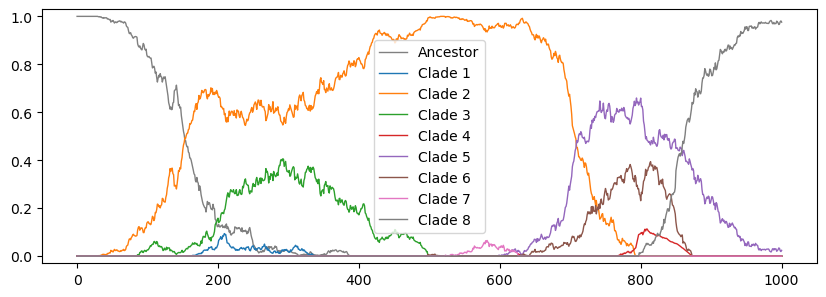

Removed clades are:  set()


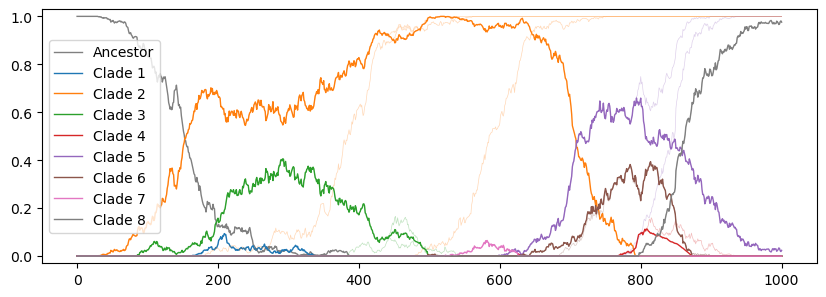

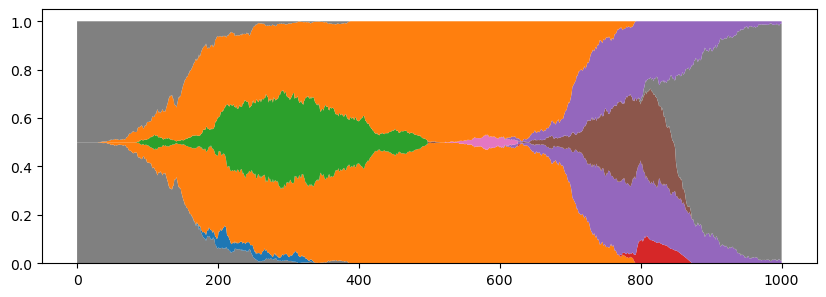

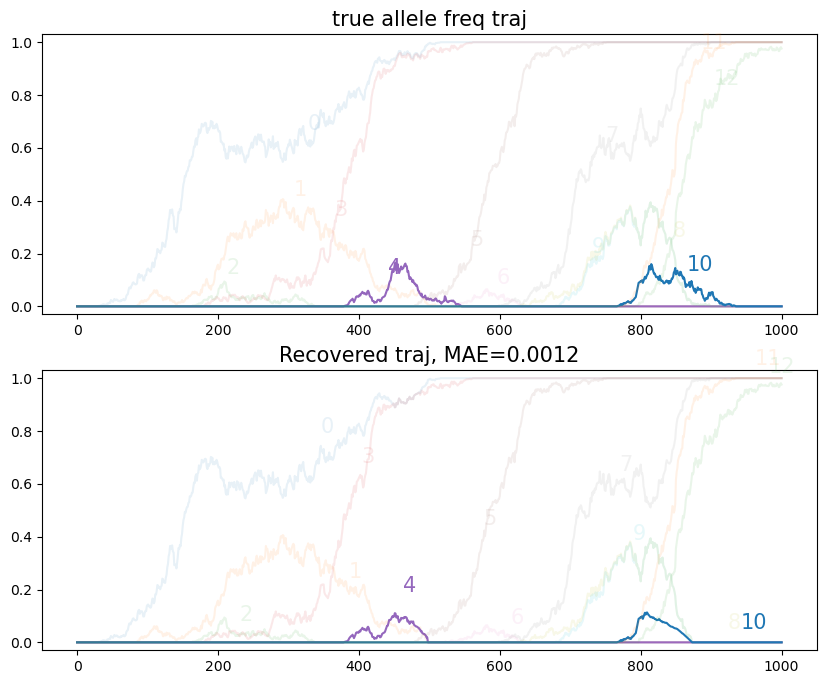

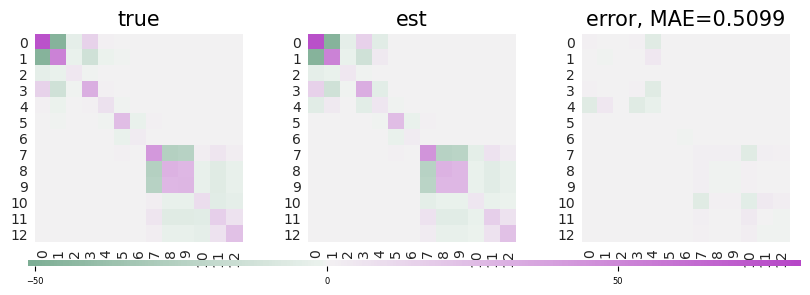

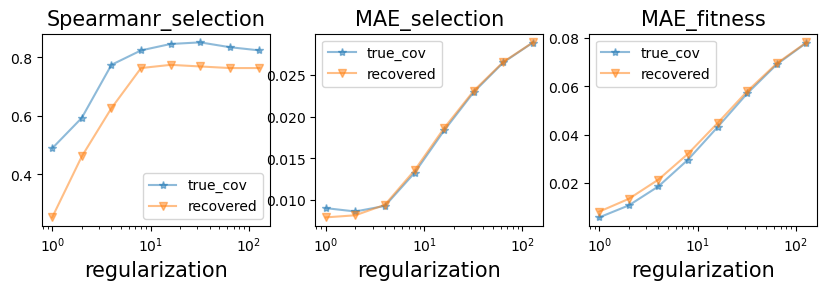

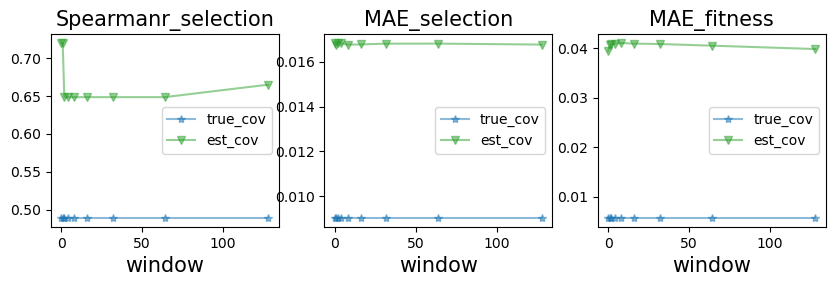

Plotting recovered results using regularization of 1, window of 1


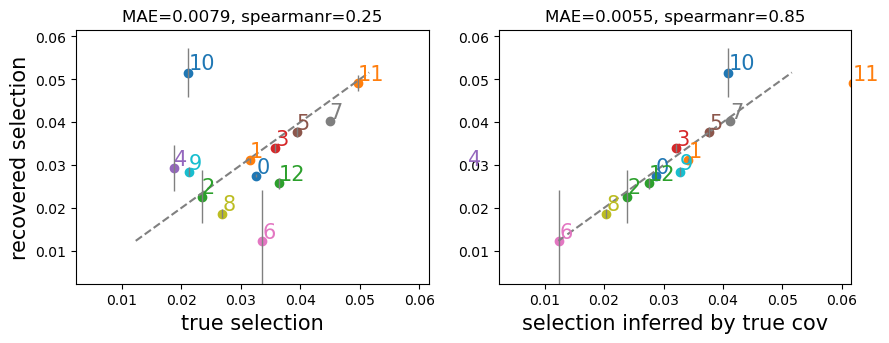

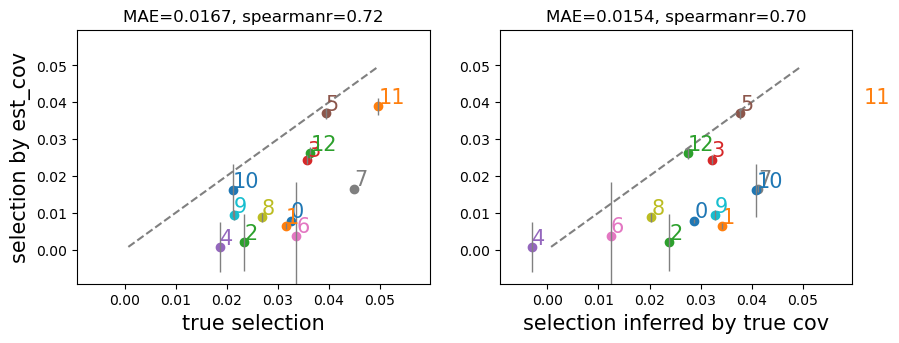

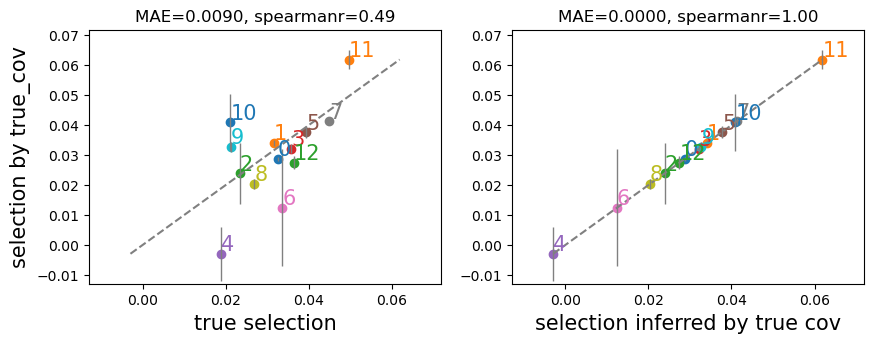

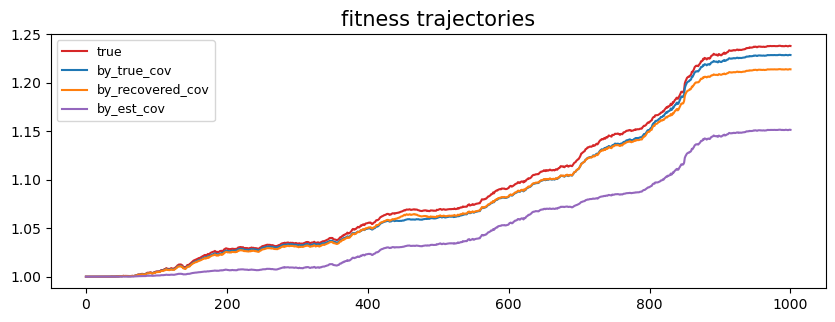

Plotting recovered results using regularization of 1, window of 1


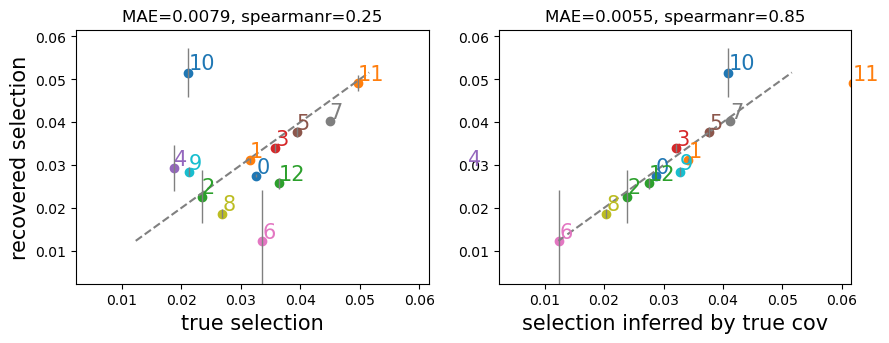

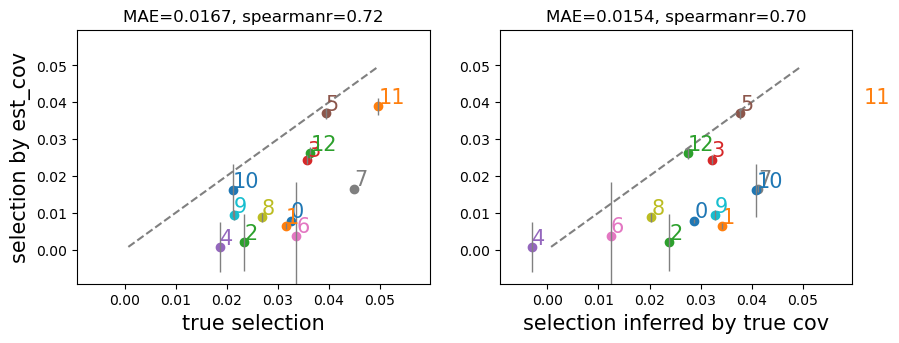

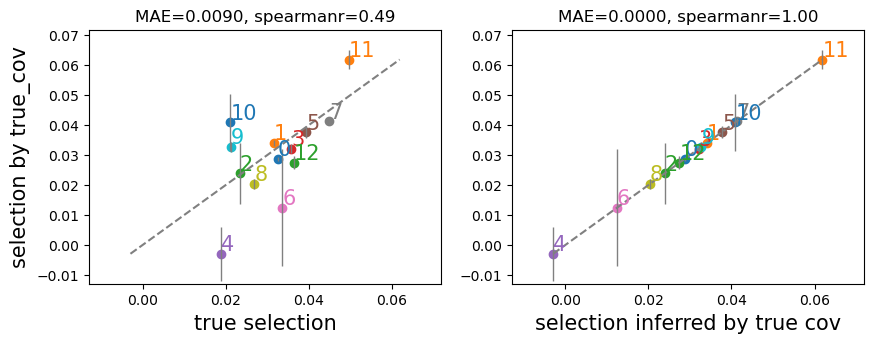

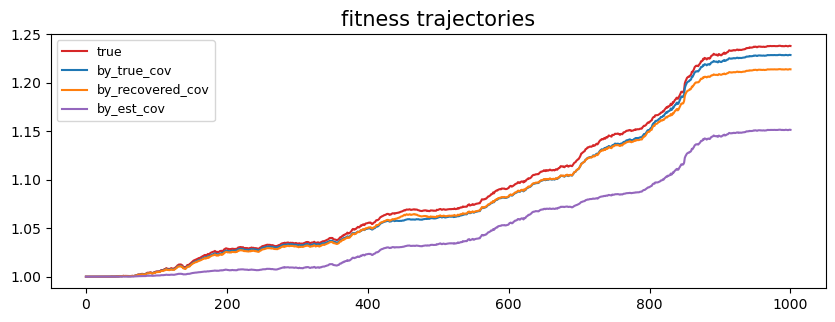

CPU times: user 10.9 s, sys: 516 ms, total: 11.4 s
Wall time: 11.3 s


In [30]:
%%time
reload()
params = SH.Params()  # Default parameters for simulation
# Load the first simulation, and get reconstruction result
simulation = SH.load_simulation(params, 0)
reconstruction, evaluation = SH.get_reconstruction_of_simulation(simulation, verbose=True, debug=True, plot=True)

cladeFixedTimes = [498, 873]
period boundaries:  [(0, 499), (498, 874), (873, 1001)]
ancestors:  [0, 2, 5, 8]
refined period boundaries:  [(0, 499), (499, 798), (798, 1001)]


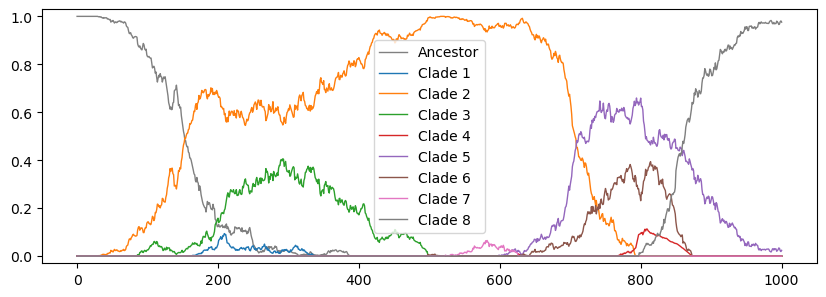

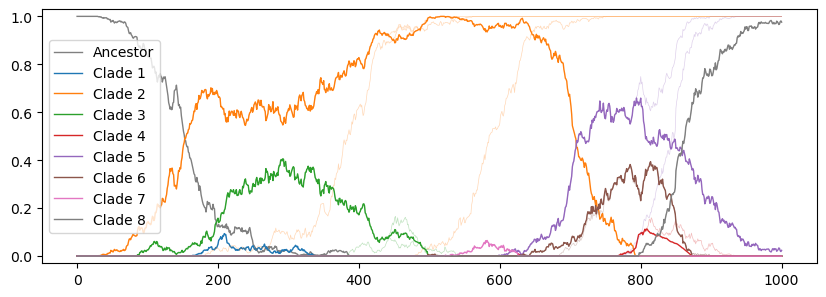

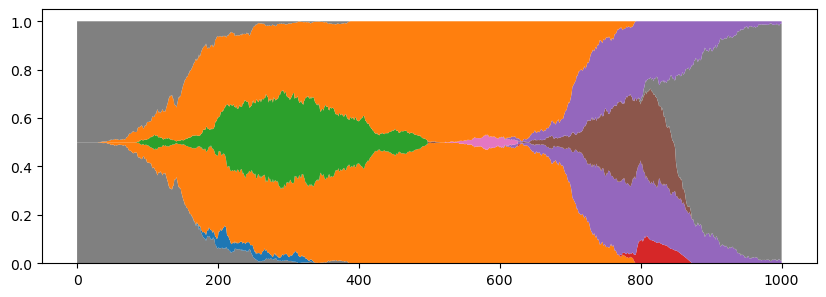

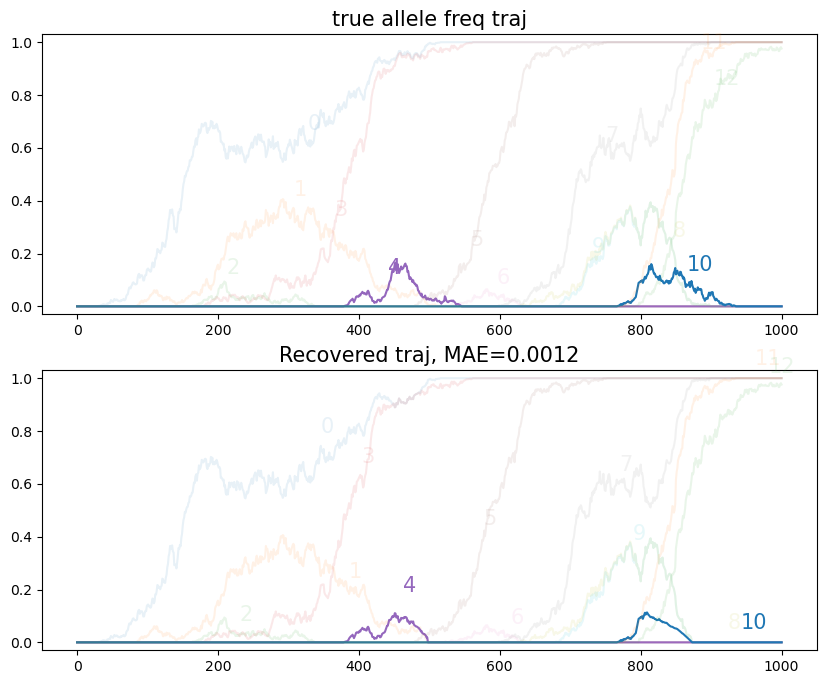

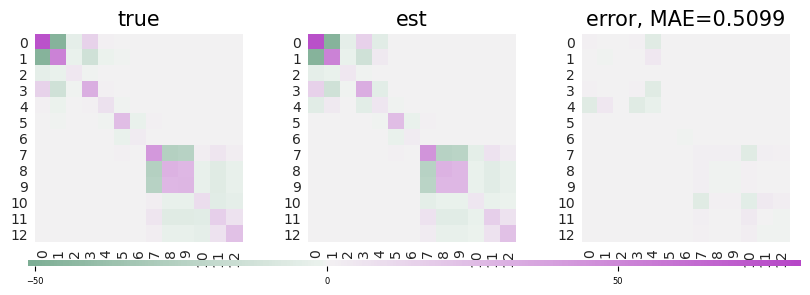

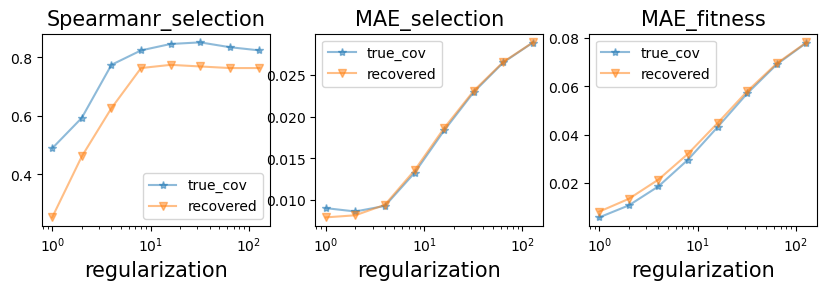

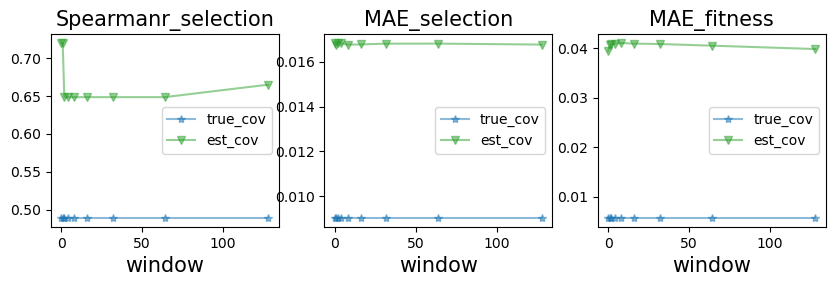

Plotting recovered results using regularization of 1, window of 1


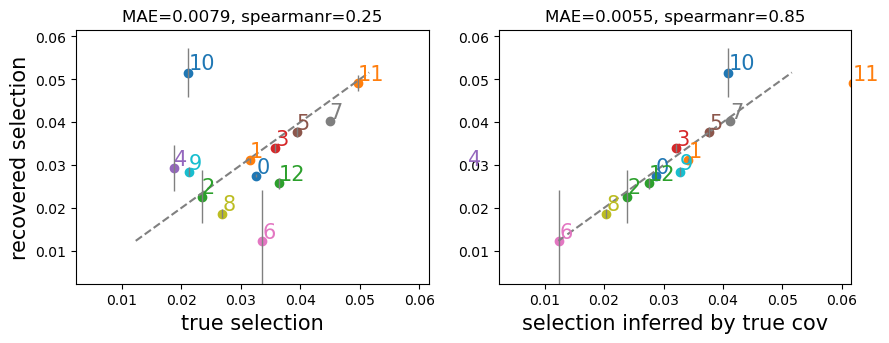

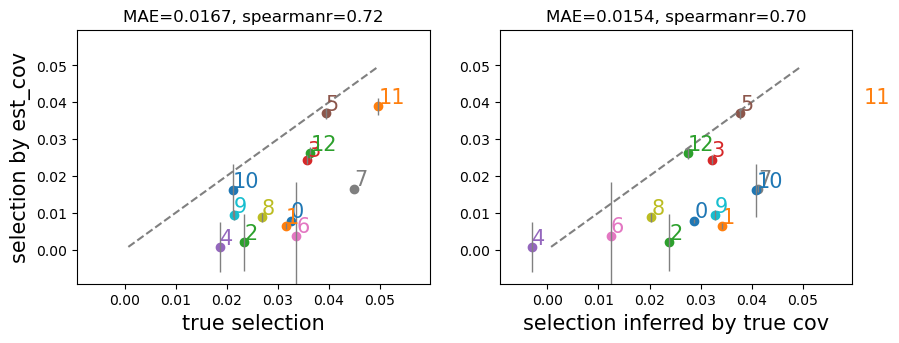

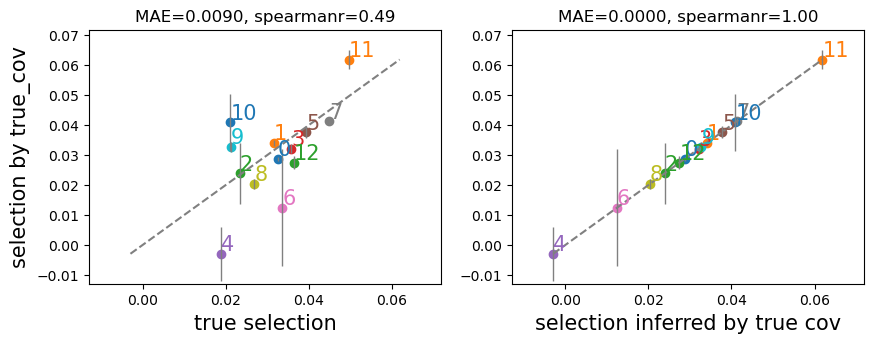

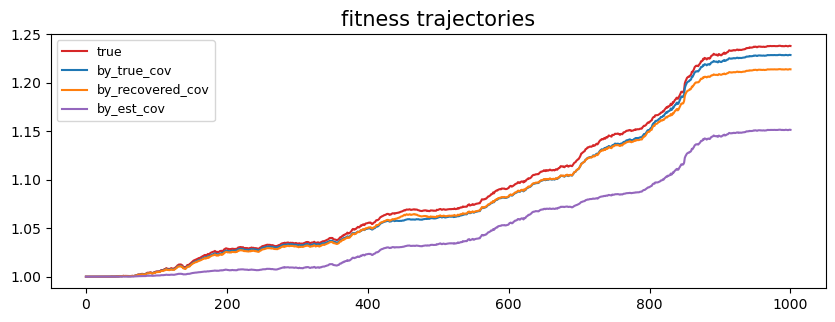

Plotting recovered results using regularization of 1, window of 1


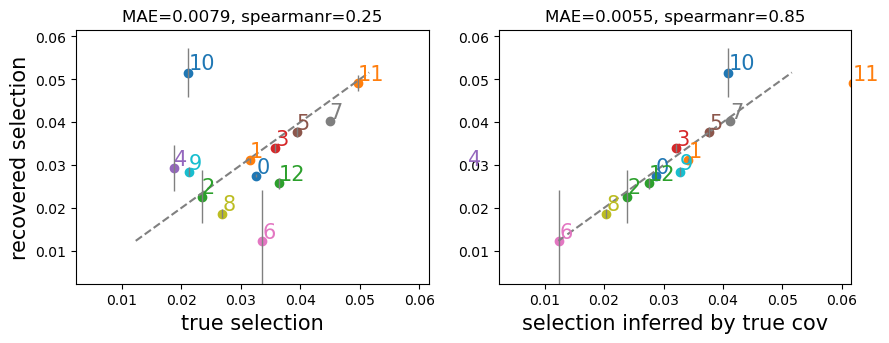

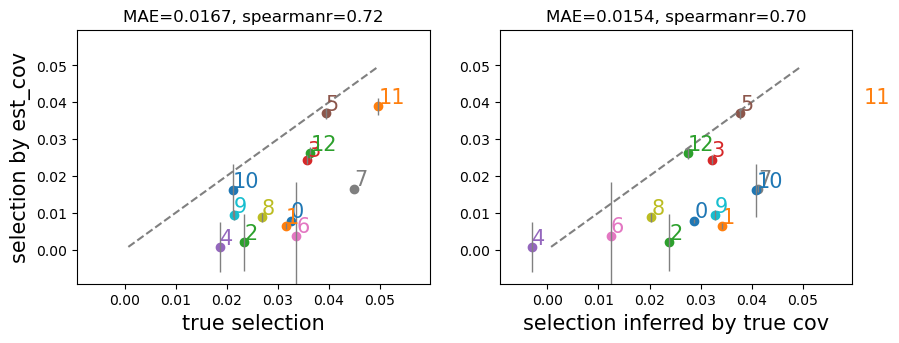

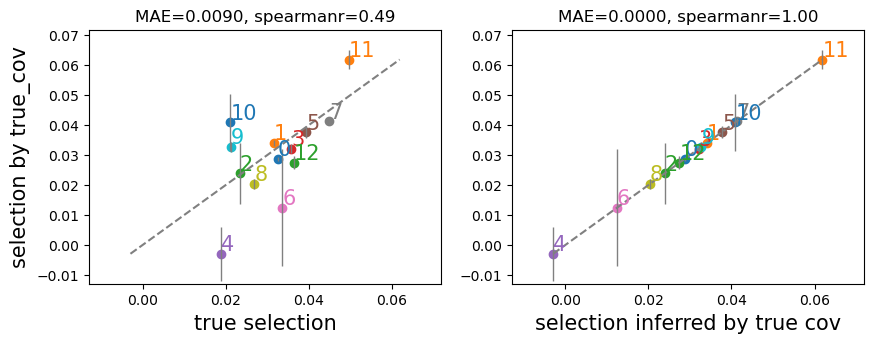

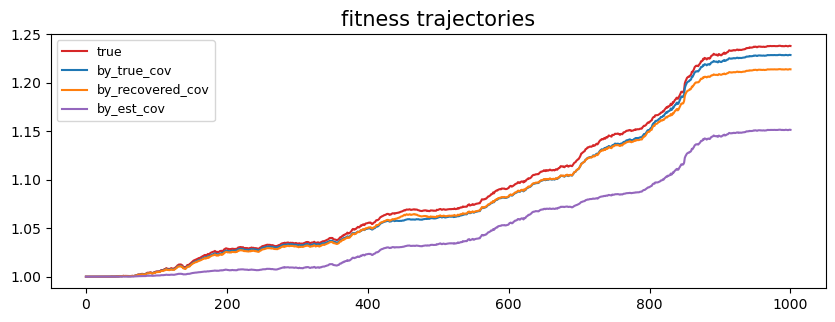

CPU times: user 9.04 s, sys: 290 ms, total: 9.33 s
Wall time: 9.32 s


In [37]:
%%time
reload()
params = SH.Params()  # Default parameters for simulation
# Load the first simulation, and get reconstruction result
simulation = SH.load_simulation(params, 0)
reconstruction, evaluation = SH.get_reconstruction_of_simulation(simulation, verbose=False, debug=False, plot=True)

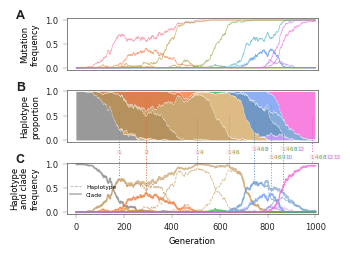

In [22]:
reload()
FIG.plot_figure_reconstruction_example(simulation, reconstruction, 
    annotate_together=True, plot_single_column=True, 
    plot_dot_for_WT_locus=False, add_background_behind_annotation=True,
    annotation_ys=[1.22] * 4 + [1.3, 1.12, 1.3, 1.12],
    genotype_color_indices_to_skip=[7, 8, 9],
    save_file=FIG_DIR + "/fig-reconstruction-example-new.pdf")


In [12]:
reload()
genotypes, genotype_frequencies, genotype_index_to_clade, clade_to_genotype_indices = FIG.get_genotype_info_from_simulation(simulation, reconstruction)


In [14]:
for i, genotype in enumerate(genotypes):
    clade = genotype_index_to_clade[i]
    t, max_freq = np.argmax(genotype_frequencies[i]), np.max(genotype_frequencies[i])
    print(f'Genotype {genotype} belongs to clade {clade}, reaches {max_freq} at {t}')

Genotype [0 0 0 0 0 0 0 0 0 0 0 0 0] belongs to clade 0, reaches 1.0 at 0
Genotype [1 0 0 0 0 0 0 0 0 0 0 0 0] belongs to clade 2, reaches 0.691 at 177
Genotype [0 1 0 0 0 0 0 0 0 0 0 0 0] belongs to clade 3, reaches 0.406 at 292
Genotype [0 0 1 0 0 0 0 0 0 0 0 0 0] belongs to clade 1, reaches 0.094 at 209
Genotype [1 0 0 1 0 0 0 0 0 0 0 0 0] belongs to clade 2, reaches 0.927 at 505
Genotype [1 0 0 1 1 0 0 0 0 0 0 0 0] belongs to clade 3, reaches 0.166 at 452
Genotype [1 0 0 1 0 1 0 0 0 0 0 0 0] belongs to clade 2, reaches 0.89 at 638
Genotype [1 0 0 1 0 0 1 0 0 0 0 0 0] belongs to clade 7, reaches 0.065 at 582
Genotype [1 0 0 1 0 1 0 1 0 0 0 0 0] belongs to clade 5, reaches 0.647 at 742
Genotype [1 0 0 1 0 1 0 0 1 0 0 0 0] belongs to clade 6, reaches 0.054 at 673
Genotype [1 0 0 1 0 1 0 0 1 1 0 0 0] belongs to clade 6, reaches 0.394 at 814
Genotype [1 0 0 1 0 1 0 1 0 0 1 0 0] belongs to clade 4, reaches 0.16 at 815
Genotype [1 0 0 1 0 1 0 1 0 0 0 1 0] belongs to clade 5, reaches 0.317

In [23]:
%%time
reload()
(MAE_cov, Spearmanr_cov, Pearsonr_cov, MAE_selection, Spearmanr_selection, 
 Pearsonr_selection, MAE_fitness, Spearmanr_fitness, 
 Pearsonr_fitness) = SH.parse_performance_on_simulated_data(params, computePerfOnGenotypeFitness=True)


Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
CPU times: user 6.52 s, sys: 122 ms, total: 6.64 s
Wall time: 6.73 s


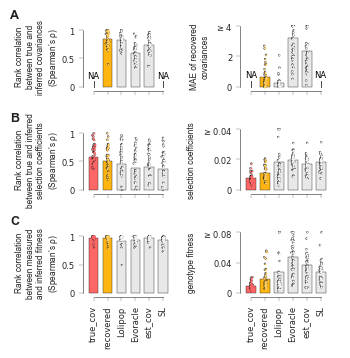

In [25]:
reload()
FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
    Spearmanr_cov, MAE_selection, Spearmanr_selection, 
    MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
    two_columns=True, evaluate_fitness=True,
    save_file=FIG_DIR + "/fig-perf-sim-true-new.pdf")

# Lolipop on simulated data

## Create table input, and output directories for Lolipop

In [88]:
reload()
SH.create_tables_for_Lolipop(p)

In [98]:
with open(f'{LOLIPOP_JOBS_DIR}/create_directories.sh', 'w') as fp:
    fp.write('#!/bin/sh\n')
    for n in range(p.num_trials):
        fp.write(f'mkdir ../output/n={n}' + '\n')

## Run lolipop in command line

`
lolipop lineage --input [input filename] --output [output folder]
`

In [93]:
reload()
SH.create_job_file_for_Lolipop(p)

### Save parsed output file

In [97]:
reload()
SH.save_parsed_output_for_Lolipop(p)

### Save inference results

In [39]:
%%time
reload()
SH.save_Lolipop_inference_on_simulated_date(p)

CPU times: user 20.7 s, sys: 118 ms, total: 20.8 s
Wall time: 21 s


/Users/yunxiao/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


# Evoracle on simulated data

In [16]:
reload()
p = SH.Params()
SH.generate_evoracle_scripts(p, save_geno_traj=True)

In [57]:
reload()
results_evoracle = SH.load_simulation_results_for_evoracle(p)

In [82]:
reload()
SH.check_simulation_results_for_evoracle(p, results_evoracle=results_evoracle)

  n    MAE_traj    # geno    Spearmanr_s    Spearmanr_s_by_geno_traj
  0  0.00557989        44       0.741758                   0.741758
  1  0.00344382        22       0.05                       0.05
  2  0.00581212        51       0.346429                   0.339286
  3  0.00686108        59       0.189286                   0.192857
  4  0.00435846        41       0.127273                   0.127273
  5  0.003277          21       0.214286                   0.214286
  6  0.00575372        38       0.248485                   0.381818
  7  0.00363138        22       0.52381                    0.452381
  8  0.0101729        108       0.120743                   0.0670795
  9  0.00491709        37      -0.163636                  -0.2
 10  0.00503183        41       0.775824                   0.775824
 11  0.00597621        41       0.527273                   0.527273
 12  0.00671896        56       0.626374                   0.683516
 13  0.00147044         6      -1                      

### An example: n=0

In [51]:
reload()
n = 0
res = SH.load_evoracle(n)
true_geno_traj = SH.parse_geno_traj_for_a_simulation(p, n)
params = SH.Params()
simulation = SH.load_simulation(params, 0)
reconstruction, evaluation = SH.get_reconstruction_of_simulation(simulation)

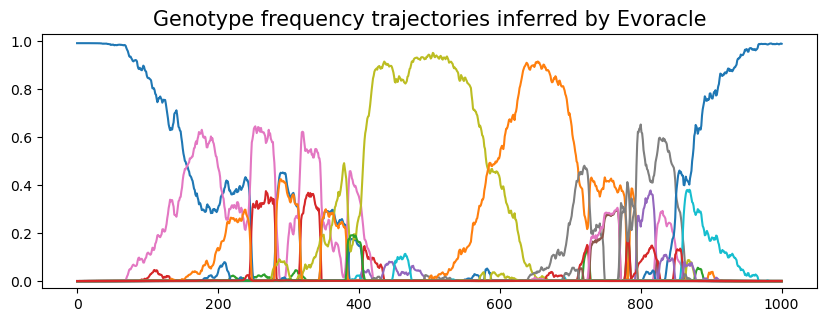

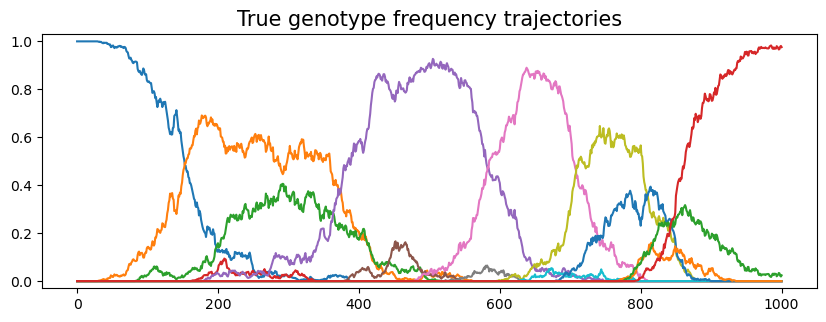

In [50]:
AP.plotTraj(res['geno_traj'], title='Genotype frequency trajectories inferred by Evoracle')
AP.plotTraj(true_geno_traj, title='True genotype frequency trajectories')

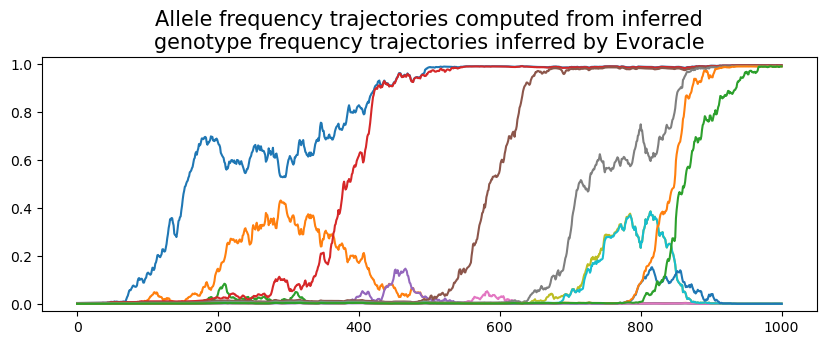

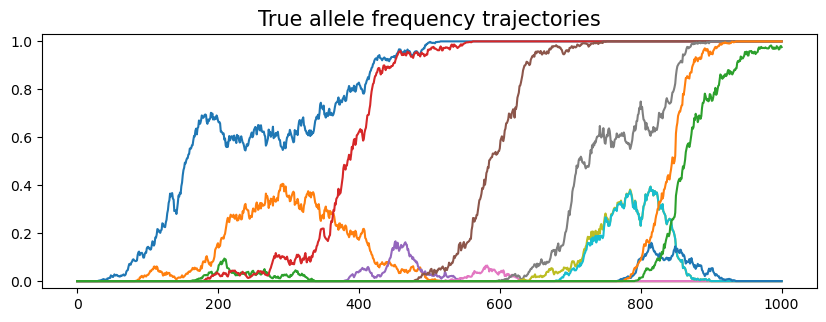

In [83]:
AP.plotTraj(res['traj_from_geno_traj'], title='Allele frequency trajectories computed from inferred\ngenotype frequency trajectories inferred by Evoracle')
AP.plotTraj(simulation['traj'], title='True allele frequency trajectories')


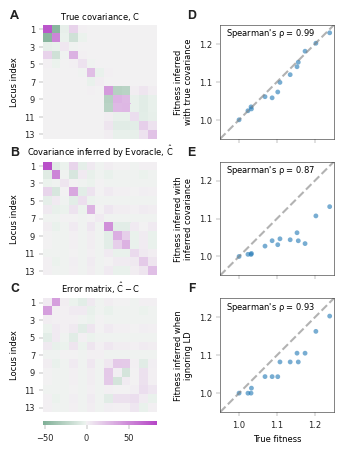

In [55]:
reload()
FIG.plot_figure_performance_Evoracle_example(simulation, reconstruction, evaluation, results_evoracle[n])

In [81]:
list(results_evoracle[n].keys())

['traj',
 'genotypes',
 'traj_from_geno_traj',
 'int_cov',
 'selection',
 'selection_from_geno_traj',
 'geno_traj']

# haploSep on simulated data

In [65]:
reload()
# First save simulation trajectories as input for haploSep
SH.save_simulation_traj_for_haplosep(p)

In [74]:
%%time
reload()
# After running haploSep using the R script, 
# parse the results and save the parsed output
_ = SH.parse_simulation_results_for_haplosep(p, save=True)

n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	CPU times: user 20.6 s, sys: 288 ms, total: 20.9 s
Wall time: 20.8 s


In [80]:
reload()
SH.check_simulation_results_for_haplosep(p)

  n    MAE_traj    # geno    Spearmanr_s    Spearmanr_s_by_geno_traj
  0   0.179164          2    -0.722752                     0.722752
  1   0.183922          2    -0.301258                     0.226301
  2   0.111271          2    -0.153299                    -0.166266
  3   0.179388          2    -0.100109                     0.0349005
  4   0.0904661         2     0.387689                    -0.204837
  5   0.226827          2    -0.428571                    -0.072075
  6   0.0921668         2    -0.317079                     0.385337
  7   0.155176          2     0.335335                    -0.202939
  8   0.0736202         2     0.104984                    -0.204911
  9   0.151407          2    -0.036586                     0.0548344
 10   0.104307          2     0.0157524                    0.0486785
 11   0.149186          2     0.0366988                   -0.507218
 12   0.112317          2     0.643599                    -0.519958
 13
 14   0.283501          2     0.2       